
# HYPERUNIFORMITY NUMERICAL PROJECT - Question 2 #
Monroy Merida Diana Laura, Candellone Elena, Ghivarello Sara, Pierannunzi Elena  

In [1]:
#import useful packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy import random
import time

# Shuffled Matrix generation


In [2]:
def shuffled(L, Δ):
    
    A=[]
    original = np.linspace(0,L-1,L)
    
    for i in original:
        for j in original:
        
            x = i+random.uniform(low= -Δ/2, high=Δ/2)   
            y = j+random.uniform(low= -Δ/2, high=Δ/2)       
            A.append([x,y])
            
    return A

# Distance between patricles

Takes a point $x_0$ and a matrix. Returns an array that contains the distances between all points of the matrix and $x_0$.

i.e. $$ arr\_dist = [distance(x_0,x_1),distance(x_0,x_2) ...]$$

In [3]:
def distance(x_0,matrix,L):
    
#arrays with all x and y coordinates of matrix elements
    x = [sites[0] for sites in matrix]
    y = [sites[1] for sites in matrix]
    
    delta_x = [abs(x_0[0]-i) if abs(x_0[0]-i)<=L/2 else (L-abs(x_0[0]-i)) for i in x]
    delta_y = [abs(x_0[1]-j) if abs(x_0[1]-j)<=L/2 else (L-abs(x_0[1]-j)) for j in y]
    
#store all the distances into an array
    arr_dist = [(delta_x[i]**2 + delta_y[i]**2)**(1/2) for i in range(len(delta_x))]
    
    return arr_dist

# Radii generation
Generate an array, given the size of the matrix L and the number of steps, with

$$ \{r\} \mid r \in [0.1,L/2] $$ with a certain number of values (steps)

In [4]:
def radii(L, steps):
    
    radius = np.linspace(0.1,L/2,num=steps)
    
    return radius

# Center random generation
Choose randomly a center $x_0$ inside the matrix of size L x L

Generate an array with n values of $x_0$

In [5]:
def x_0(L):         
    
    x = random.uniform(int(0),int(L))
    y = random.uniform(int(0),int(L))
    
    center = [x,y]
    
    return center

def vec_x0(L,n):
    
    v = [x_0(L) for i in range(n)]
    
    return v

# Count the neighbours
This function counts how many particles are into a certain distance from the center $x_0$.

In particular, we give as a parameter an array of radii and we store in the array counts all the countings for each radius.
i.e. $$count = [ count\_R(r1), count\_R(r2) ... ]$$

In [6]:
def count_s(x_0,mat,radius,L): #count how many points are at a distance <= r from x
    
    dist = distance(x_0,mat,L)
    dist.sort()
    d = np.array(dist)
    counts = []
    
    for R in radius:
        count_R = np.count_nonzero(d <= R)
        counts.append(count_R)

    return counts

Generate an matrix (array of arrays) with the countings for each value of x_0 (take n of them).
The matrix will have rows determined by $\{x_0\}$ and columns determined by $\{R\}$

In [7]:
def arr_counts(L,n,radius,mat):
    
    v = vec_x0(L,n)
    arr = [count_s(x0,mat,radius,L) for x0 in v]
    
    return arr

# Calculate the rescaled variance
This functions takes the size L, the number n of $x_0$'s, the set of radii and the matrix in order to calculate the rescaled variance $$\frac{\sigma(R)^2}{R^2 }= \frac{\langle N(R)^2 \rangle - \langle N(R) \rangle^2}{R^2}$$
For each size L an array of variances is created.

In [8]:
def variance(L,n,radius,mat):
    
    arr = arr_counts(L,n,radius,mat)
    m = np.array(arr)
    arr_var = []
    
    for i in range(len(radius)):
        mom = np.power(m[:,i],2)
        var = (np.average(mom)-np.power(np.average(m[:,i]),2))/radius[i]**2
        arr_var.append(var)
        
    return arr_var

# 2.1
_Modify the previous code for simulating this new system and plot rescaled variance as
a function of the distance for different systems when ∆ = 1, 2, 3, 4, 5. (L = 100). Save
the program and generate the pdf files for the different figures. What do you oberve ?
Give a physical interpretation of the observation._

In [9]:
start = time.time()
size = 100
Δ=[1, 2, 3, 4, 5]
arrays_var1 = []
radius = []


for i in range(len(Δ)):
    
    a = shuffled(size,Δ[i])
    radius.append(radii(size,200))
    arrays_var1.append(variance(size,10000,radius[i],a))
    
total1 = time.time()-start

In [10]:
np.savetxt("arrays1.txt", np.array(arrays_var1))

In [11]:
print("total execution time: " + str(total1) + " s")

total execution time: 934.7271862030029 s


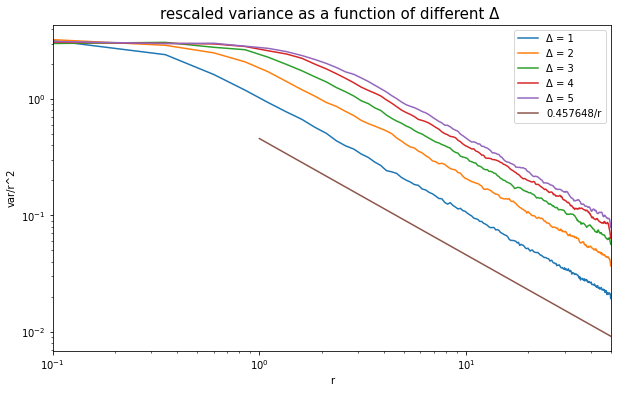

In [27]:
#plot the results in log-log scale
size = 100
Δ=[1, 2, 3, 4, 5]
plt.figure(figsize=(10, 6))
ax = plt.subplot(111) 
plt.xlim(0.1, 50) 

for i in range(len(Δ)):
    plt.plot(radius[i], arrays_var1[i], label = 'Δ = ' + str(Δ[i]))
    plt.xscale('log')
    plt.yscale('log')

x = np.linspace(1, 50, 100)
plt.plot(x,0.457648/x, label = '0.457648/r')
plt.title('rescaled variance as a function of different Δ ', fontsize=15)
plt.xlabel('r')
plt.ylabel('var/r^2')
plt.legend()
plt.savefig("variance_delta.png")

# 2.2
_Modify the previous code in order to plot for ∆ = 2 the results for L = 50, 100, 200. Comment your results._

In [13]:
start = time.time()
size = [50,100,200]
Δ= 2
arrays_var2 = []
radius2 = []


for i in range(len(size)):
    a = shuffled(size[i],Δ)
    radius2.append(radii(size[i],200))
    arrays_var2.append(variance(size[i],10000,radius2[i],a))
    
    
total2 = time.time()-start

In [14]:
np.savetxt("arrays2.txt", np.array(arrays_var2))

In [15]:
print("total execution time: " + str(total2) + " s")

total execution time: 935.0082337856293 s


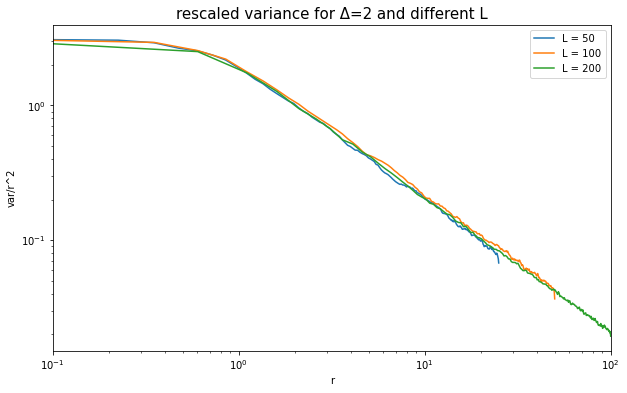

In [28]:
#plot the results in log-log scale
size = [50,100,200]
Δ = 2
plt.figure(figsize=(10, 6))
ax = plt.subplot(111) 
plt.xlim(0.1, 100) 

for i in range(len(size)):
    plt.plot(radius2[i], arrays_var2[i], label = 'L = ' + str(size[i]))
    plt.xscale('log')
    plt.yscale('log')

x = np.linspace(1, 100, 1000)
#plt.plot(x,0.457648/x)
plt.title('rescaled variance for Δ=2 and different L', fontsize=15)
plt.xlabel('r')
plt.ylabel('var/r^2')
plt.legend()
plt.savefig("variance_delta2.png")